In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime as dt

### Q1. Read the CSV file into a pandas dataframe. (1 pt)

In [3]:
## Uploading the Freemont Bridge's bicycle count data
frmnt_brdge_bcycle = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv")
frmnt_brdge_bcycle.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


### Q2. Add columns to the dataframe containing: ( 3 pt)
- The total (East + West) bicycle count
- The hour of the day
- The year

In [4]:
## Adding total bicyle count
frmnt_brdge_bcycle['total'] = frmnt_brdge_bcycle['Fremont Bridge East Sidewalk'] + frmnt_brdge_bcycle['Fremont Bridge West Sidewalk']


In [5]:
## Adding hour of the day
## Converting to timestamp
frmnt_brdge_bcycle['Date'] = pd.to_datetime(frmnt_brdge_bcycle['Date'])
frmnt_brdge_bcycle['hour_of_day'] = pd.to_datetime(frmnt_brdge_bcycle['Date']).dt.strftime("%H")


In [6]:
## Adding the year
frmnt_brdge_bcycle['Year'] = pd.to_datetime(frmnt_brdge_bcycle['Date']).dt.strftime("%Y")

In [7]:
frmnt_brdge_bcycle.Year.unique()
frmnt_brdge_bcycle.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
total                                  float64
hour_of_day                             object
Year                                    object
dtype: object

### Q3. Create a dataframe with the subset of data from the year 2016 (1 pt)

In [9]:
frmnt_data_2016 = frmnt_brdge_bcycle.loc[frmnt_brdge_bcycle['Year'] == '2016']
frmnt_data_2016.Year.unique()

array(['2016'], dtype=object)

### Q4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

In [10]:
hourly_count = frmnt_brdge_bcycle.groupby(['hour_of_day'], as_index = False).aggregate({'total' : 'sum'})
hourly_count.head()
#frmnt_brdge_bcycle.plot.bar(x="hour_of_day", y = "total")

,hour_of_day,total
0,00,31486.0
1,01,16683.0
2,02,10908.0
3,03,8064.0
4,04,17989.0


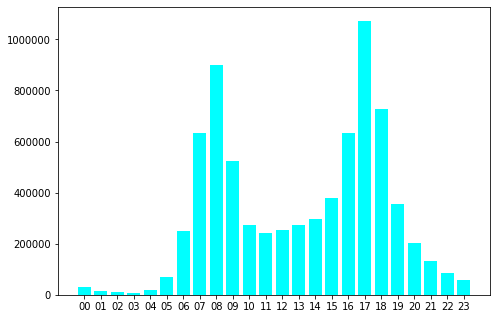

In [11]:
#hourly_count.plot.bar(x = 'hour_of_day', y = 'total',  rot = 0)
fig = plt.figure()
ax = fig.add_axes([0,1,1,1])
ax.bar(hourly_count.hour_of_day,hourly_count.total, color = [0,1,1])
plt.show()

### Q5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

In [12]:
avg_hour = frmnt_brdge_bcycle.groupby(['hour_of_day'], as_index = False).agg({'total' : 'mean'})
avg_hour.sort_values('total', ascending = False, inplace = True)
avg_hour

,hour_of_day,total
17,17,392.289003
8,08,328.783339
18,18,265.710632
16,16,232.024114
7,07,231.050055
9,09,191.395102
15,15,138.525027
19,19,129.591158
14,14,108.267446
10,10,100.116228


#### Thus we see that 17th hour of the day, i.e. 5 PM in the evening is the most busy hour of the day in terms of average bicycle crossings